In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from imblearn.over_sampling import SMOTE


In [58]:
#loading data for train
train_data=pd.read_csv('data/titanic_train.csv')
rows,columns=train_data.shape
print(f'the number of rows:{rows} number of columns:{columns}')
train_data.head(10)

the number of rows:891 number of columns:12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
#loading data for test
test_data=pd.read_csv('data/titanic_test.csv')
rows,columns=test_data.shape
print(f'the number of rows:{rows} number of columns:{columns}')
test_data.head(10)


the number of rows:418 number of columns:11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


removeing unused inpute variable 

In [60]:
#loading rmoving  coulumns Remove Cabin with alot missing data remove not imortant data like  'PassengerId',
# 'Name','Ticket' renove 'Embarked','Fare'because Fare is exactly equal pcalss
train_data=train_data.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Fare'])

In [61]:
test_data=test_data.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Fare'])

In [62]:
#count missing data i others coluns
na_count=train_data.isna().sum()
print ("Number of missing values in train: ", na_count)

Number of missing values in train:  Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


In [63]:
na_count=test_data.isna().sum()
print(f'Number of missing values in test: {na_count}')

Number of missing values in test: Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64


In [64]:
# fiiling missig data of age based on median of each group of Pcalss and Age
#  Step 1: Group by 'Sex' and 'Pclass' to compute median Age
age_median_groupby_value = train_data.groupby(['Sex', 'Pclass'])['Age'].median()

# Function to fill missing Age
def fill_age(row):
    if pd.isna(row['Age']):
        return age_median_groupby_value.loc[(row['Sex'], row['Pclass'])]
    return row['Age']

train_data['Age'] = train_data.apply(fill_age, axis=1)

naAge_count=train_data['Age'].isna().sum()
print(f'number of na in Age column in test_data: {naAge_count}')



number of na in Age column in test_data: 0


In [65]:
age_median_groupby_value = test_data.groupby(['Sex', 'Pclass'])['Age'].median()
test_data['Age'] = test_data.apply(fill_age, axis=1)
naAge_count=train_data['Age'].isna().sum()
print(f'number of na in Age column in test_data: {naAge_count}')


number of na in Age column in test_data: 0


In [66]:
#convert Categorical Data to numerical or dummy  value

train_data['Sex'] = (train_data['Sex'] == 'male').astype(int)

train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
5,0,3,1,25.0,0,0
6,0,1,1,54.0,0,0
7,0,3,1,2.0,3,1
8,1,3,0,27.0,0,2
9,1,2,0,14.0,1,0


In [67]:

test_data['Sex'] = (test_data['Sex'] == 'male').astype(int)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
5,3,1,14.0,0,0
6,3,0,30.0,0,0
7,2,1,26.0,1,1
8,3,0,18.0,0,0
9,3,1,21.0,2,0


In [68]:
#slit dependent variables and response varibale
X, y = train_data.drop(columns='Survived'), train_data['Survived']


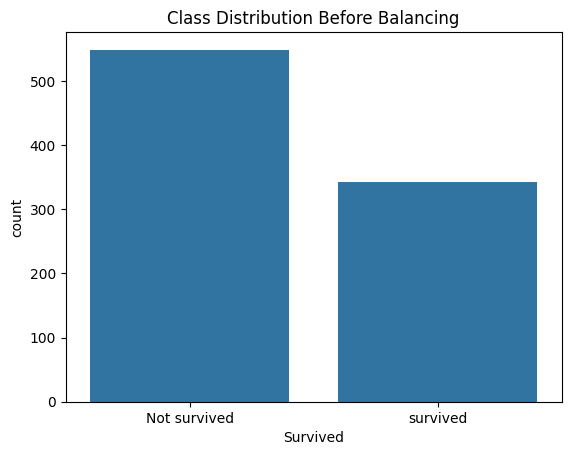

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [69]:
#checking response class balancing
map_alt = {
    0:"Not survived",
    1:"survived"
}

# Map class names for plotting
y_mapped = pd.Series( y).map(map_alt)
sns.countplot(x=y_mapped)
plt.title("Class Distribution Before Balancing")
plt.show()

print(y.value_counts(normalize=True))

In [70]:
#split train data set t0 80 percent fortrain and 20 percent for validate
X_train, X_validat, y_train, y_validat = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

In [71]:
# Apply SMOTE on  training data only for balancing train
smoter = SMOTE(random_state=42)
X_train, y_train = smoter.fit_resample(X_train, y_train)


In [72]:
#To find the best combination of hyperparameters for a DecisionTreeClassifier 
#that gives the best performance on your training data (X_train, y_train),
#using GridSearchCV and StratifiedKFold cross-validation.
#Define the base model
#Creates a Decision Tree classifier.

#Uses Gini impurity to measure the quality of a split.
#random_state=42: ensures reproducibility
#because the response class is imbalancede I used class_weight='balanced' that automatically adjusts weights inversely proportional 
#to class frequencies — useful for imbalanced datasets.
decision_tree = DecisionTreeClassifier(criterion='gini',random_state=42, class_weight='balanced')

#Set parameter grid These are the parameters that  I test them  test in different combinations to find best estimator.
#max_depth: the maximum depth of the tree (how deep the tree can go).
#min_samples_split: minimum number of samples required to split an internal node.
#min_samples_leaf: minimum number of samples required to be at a leaf node.
#None for max_depth means no limit on the tree depth.
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


#Uses StratifiedKFold to ensure each fold has the same class distribution as the full dataset (important for classification tasks).
#Splits the data into 5 parts (folds), and rotates which fold is used for validation.
#shuffle=True shuffles before splitting to reduce bias.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Perform grid search to find best param and best estimator
#GridSearchCV tries every possible combination of the parameters in param_grid with 5-fold cross-validation.
#n_jobs=-1  means useing  all available CPU cores to speed up computation.
#fit(X_train, y_train) trains models on all parameter combinations and picks the be
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=cv_strategy, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Output best parameters and best estimator
print(f"Best Parameters: {grid_search.best_params_}")




Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [73]:
#fit best estimator on train data
decision_tree = grid_search.best_estimator_
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=20, random_state=42)

decission Tree accuracy_score  befor retrain : 0.8324022346368715
decission Tree  precision_score befor retrain: 0.75
decission Tree recall_score befor retrain: 0.796875
decission Tree f1_score befor retrain: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       115
           1       0.75      0.80      0.77        64

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.83      0.83       179



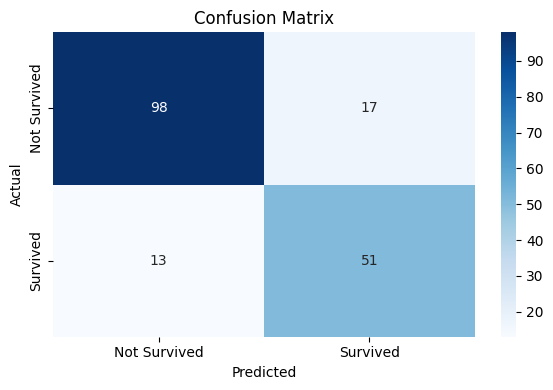

In [74]:
# Make predictions on the validate set 
y_pred = decision_tree.predict(X_validat)

# Evaluate model accuracy on the validate set
print(f'decission Tree accuracy_score  befor retrain : {accuracy_score(y_validat,y_pred)}')
print(f'decission Tree  precision_score befor retrain: {precision_score(y_validat,y_pred)}')
print(f'decission Tree recall_score befor retrain: {recall_score(y_validat,y_pred)}')
print(f'decission Tree f1_score befor retrain: {f1_score(y_validat,y_pred)}')


print(classification_report(y_validat, y_pred))
cm=confusion_matrix(y_validat,y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


we use psudo labeling for understand accuracy of model on train data set
pseudo-labeling is  a powerful technique in semi-supervised learning — with a no lable  test data set.
Pseudo-labeling is a technique where you:
Train a model on labeled data.
Use that model to predict labels for the unlabeled data.
Treat those predicted labels as if they were true (i.e., pseudo-labels).
Combine both labeled and pseudo-labeled data to retrain the model.
if the retrain model accuracy is equal or higher than the original model accuracy, then we can conclude the model prediction on the test data is accurate

Pseudo-labeled samples: 100
decission Tree accuracy_score  after retrain : 0.8324022346368715
decission Tree  precision_score after retrain: 0.75
decission Tree recall_score after retrain: 0.796875
decission Tree f1_score after retrain: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       115
           1       0.75      0.80      0.77        64

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.83      0.83       179



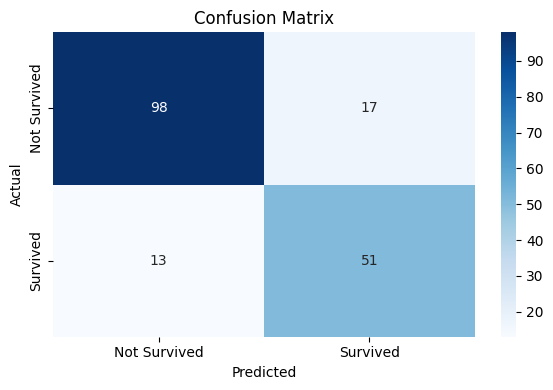

In [75]:

#predict the test data set by model 
confidence_threshold=0.90
X_test=test_data.copy()
y_pred = decision_tree.predict(X_test)


# add perdicted respose to test data set as response variables
response=test_data.copy()
response['Survived']=y_pred

#compute confidence intervall probablity for each prediction of data set
#find all observation in test data set with confidence interval probablity upeper than confidence threshold
y_probs = decision_tree.predict_proba(X_test)
confident_indices = [i for i, p in enumerate(y_probs) if max(p) > confidence_threshold]
pseudo_X = X_test.iloc[confident_indices]
pseudo_y = [np.argmax(y_probs[i]) for i in confident_indices]
print(f"Pseudo-labeled samples: {len(pseudo_X)}")

#Add pseudo-labeled data to training set
X_combined = pd.concat([X_train, pseudo_X])
y_combined = pd.concat([y_train, pd.Series(pseudo_y)])


# Retrain model on combined data
decision_tree.fit(X_combined, y_combined)

#Accuracy AFTER self-training
y_val_pred_after = decision_tree.predict(X_validat)

# Evaluate model agein on validation set
print(f'decission Tree accuracy_score  after retrain : {accuracy_score(y_validat,y_val_pred_after)}')
print(f'decission Tree  precision_score after retrain: {precision_score(y_validat,y_val_pred_after)}')
print(f'decission Tree recall_score after retrain: {recall_score(y_validat,y_val_pred_after)}')
print(f'decission Tree f1_score after retrain: {f1_score(y_validat,y_val_pred_after)}')


print(classification_report(y_validat, y_val_pred_after))
cm=confusion_matrix(y_validat,y_val_pred_after)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()




as you see after psdu labeling the model accuracy on validation test increased and it means the model perform good on test prediction

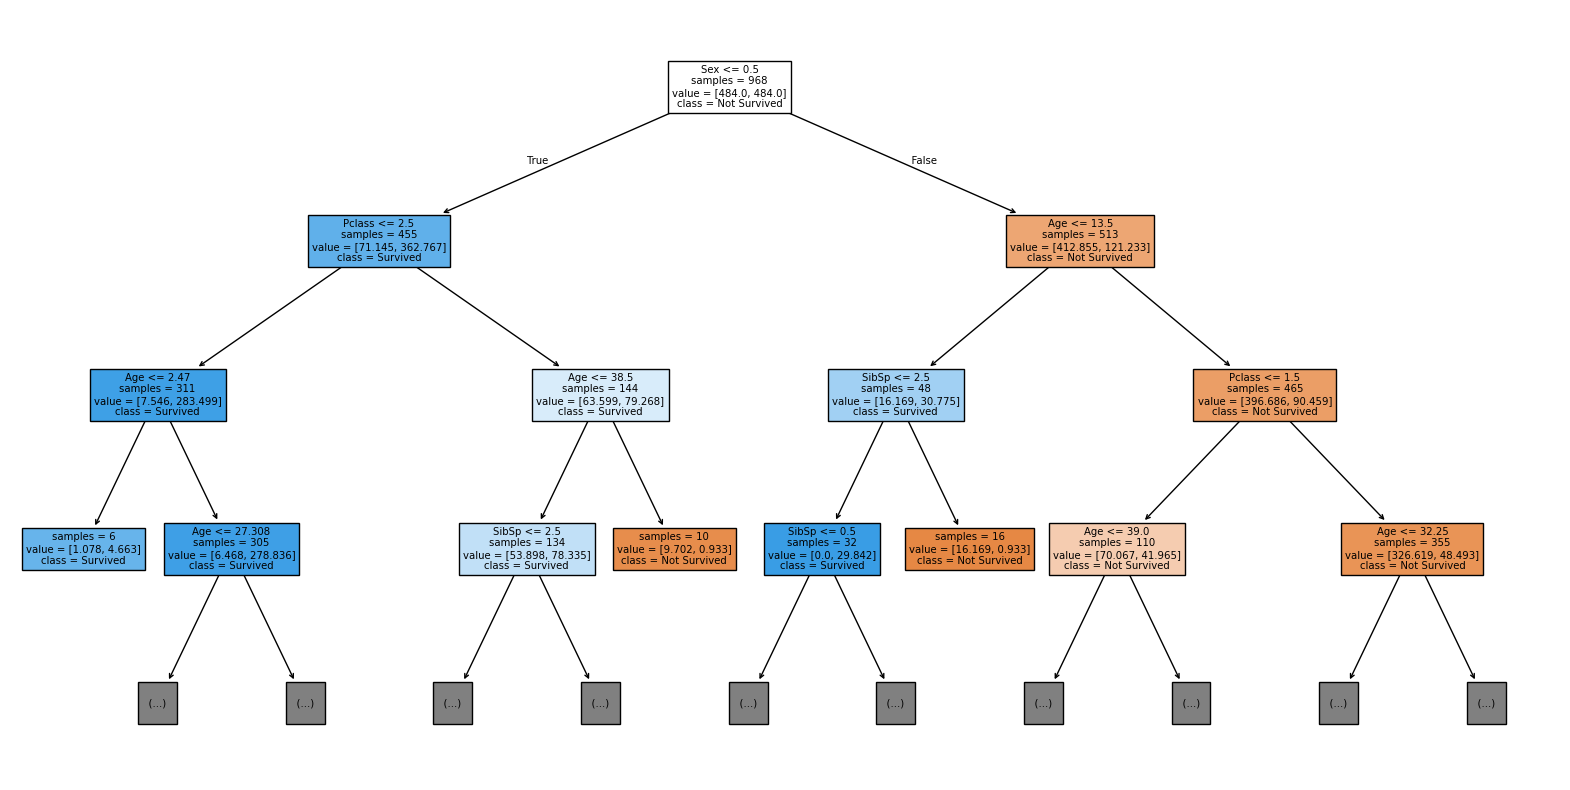

In [76]:

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns,max_depth=3,
          class_names=['Not Survived', 'Survived'], impurity=False)
plt.show()


In [77]:
#split train data set t0 80 percent fortrain and 20 percent for validate
X_train, X_validat, y_train, y_validat = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

In [78]:
#To find the best combination of hyperparameters for a DecisionTreeClassifier 
#that gives the best performance on your training data (X_train, y_train),
#using GridSearchCV and StratifiedKFold cross-validation.
#Define the base model
#Creates a Decision Tree classifier.
#Uses Gini impurity to measure the quality of a split.
#random_state=42: ensures reproducibility
#because the response class is imbalancede I used class_weight='balanced' that automatically adjusts weights inversely proportional 
#to class frequencies — useful for imbalanced datasets.
#Define RandomForestClassifier (without setting fixed parameters yet)
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

#Set parameter grid These are the parameters that  I test them  test in different combinations to find best estimator.
#max_depth: the maximum depth of the tree (how deep the tree can go).
#min_samples_split: minimum number of samples required to split an internal node.
#min_samples_leaf: minimum number of samples required to be at a leaf node.
#None for max_depth means no limit on the tree depth.
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [5, 10, 15, None],         # Tree depth
    'min_samples_split': [2, 10, 20],       # Min samples to split
    'min_samples_leaf': [1, 5, 10]          # Min samples at leaf
}


#Uses StratifiedKFold to ensure each fold has the same class distribution as the full dataset (important for classification tasks).
#Splits the data into 5 parts (folds), and rotates which fold is used for validation.
#shuffle=True shuffles before splitting to reduce bias.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#Perform grid search to find best param and best estimator
#GridSearchCV tries every possible combination of the parameters in param_grid with 5-fold cross-validation.
#n_jobs=-1  means useing  all available CPU cores to speed up computation.
#fit(X_train, y_train) trains models on all parameter combinations and picks the be
#Define the cross-validation strategy ( K-Fold)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_strategy, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Output best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}


In [79]:
# train random forest model
randomForestModel = grid_search.best_estimator_

randomForestModel.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=20, random_state=42)

random forest accuracy_score : 0.8603351955307262
random forest precision_score : 0.7910447761194029
random forest recall_score : 0.828125
random forest f1_score : 0.8091603053435115
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       115
           1       0.79      0.83      0.81        64

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



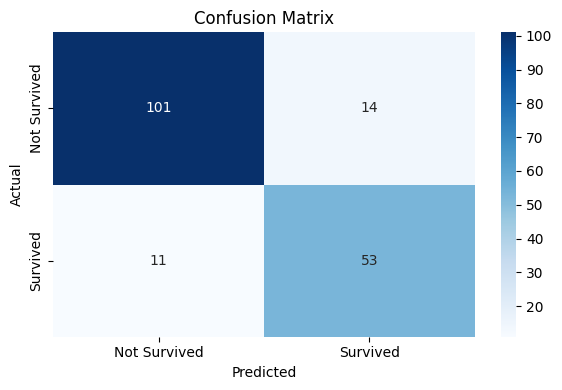

In [80]:
# predict validation set
y_pred = randomForestModel.predict(X_validat)
# Evaluate model
print(f'random forest accuracy_score : {accuracy_score(y_validat,y_pred)}')
print(f'random forest precision_score : {precision_score(y_validat,y_pred)}')
print(f'random forest recall_score : {recall_score(y_validat,y_pred)}')
print(f'random forest f1_score : {f1_score(y_validat,y_pred)}')

print(classification_report(y_validat, y_pred))
cm=confusion_matrix(y_validat,y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


we use psudo labeling for understand accuracy of model on train data set
pseudo-labeling is  a powerful technique in semi-supervised learning — with a no lable  test data set.
Pseudo-labeling is a technique where you:
Train a model on labeled data.
Use that model to predict labels for the unlabeled data.
Treat those predicted labels as if they were true (i.e., pseudo-labels).
Combine both labeled and pseudo-labeled data to retrain the model.
if the retrain model accuracy is equal or higher than the original model accuracy, then we can conclude the model prediction on the test data is accurate

Pseudo-labeled samples: 60
random forest  accuracy_score  after retrain : 0.8715083798882681
random forest   precision_score after retrain: 0.8253968253968254
random forest  recall_score after retrain: 0.8125
random forest  f1_score after retrain: 0.8188976377952756
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.83      0.81      0.82        64

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



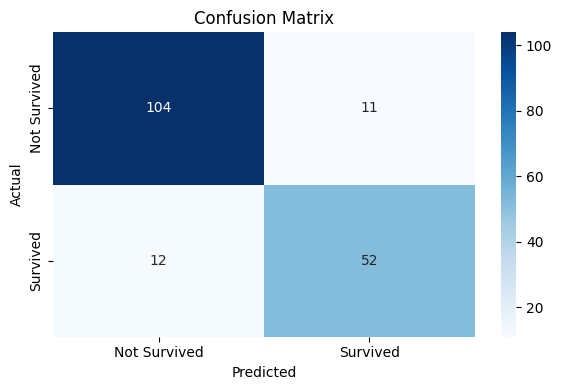

In [81]:
#predict the test data set 
confidence_threshold=0.90
X_test=test_data.copy()
y_pred = randomForestModel.predict(X_test)
response=test_data.copy()
response['Survived']=y_pred
X_test.head()
y_probs = randomForestModel.predict_proba(X_test)
confident_indices = [i for i, p in enumerate(y_probs) if max(p) > confidence_threshold]
pseudo_X = X_test.iloc[confident_indices]
pseudo_y = [np.argmax(y_probs[i]) for i in confident_indices]
print(f"Pseudo-labeled samples: {len(pseudo_X)}")

# 7. Add pseudo-labeled data to training set
X_combined = pd.concat([X_train, pseudo_X])
y_combined = pd.concat([y_train, pd.Series(pseudo_y)])


# 8. Retrain model on combined data
randomForestModel.fit(X_combined, y_combined)

#Accuracy AFTER retrain-training
y_val_pred_after = randomForestModel.predict(X_validat)

# Evaluate model agein on validation set again 
print(f'random forest  accuracy_score  after retrain : {accuracy_score(y_validat,y_val_pred_after)}')
print(f'random forest   precision_score after retrain: {precision_score(y_validat,y_val_pred_after)}')
print(f'random forest  recall_score after retrain: {recall_score(y_validat,y_val_pred_after)}')
print(f'random forest  f1_score after retrain: {f1_score(y_validat,y_val_pred_after)}')


print(classification_report(y_validat, y_val_pred_after))
cm=confusion_matrix(y_validat,y_val_pred_after)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

as you see after psudo labeling the model accuracy on validation test increased and it means the model perform good on test prediction


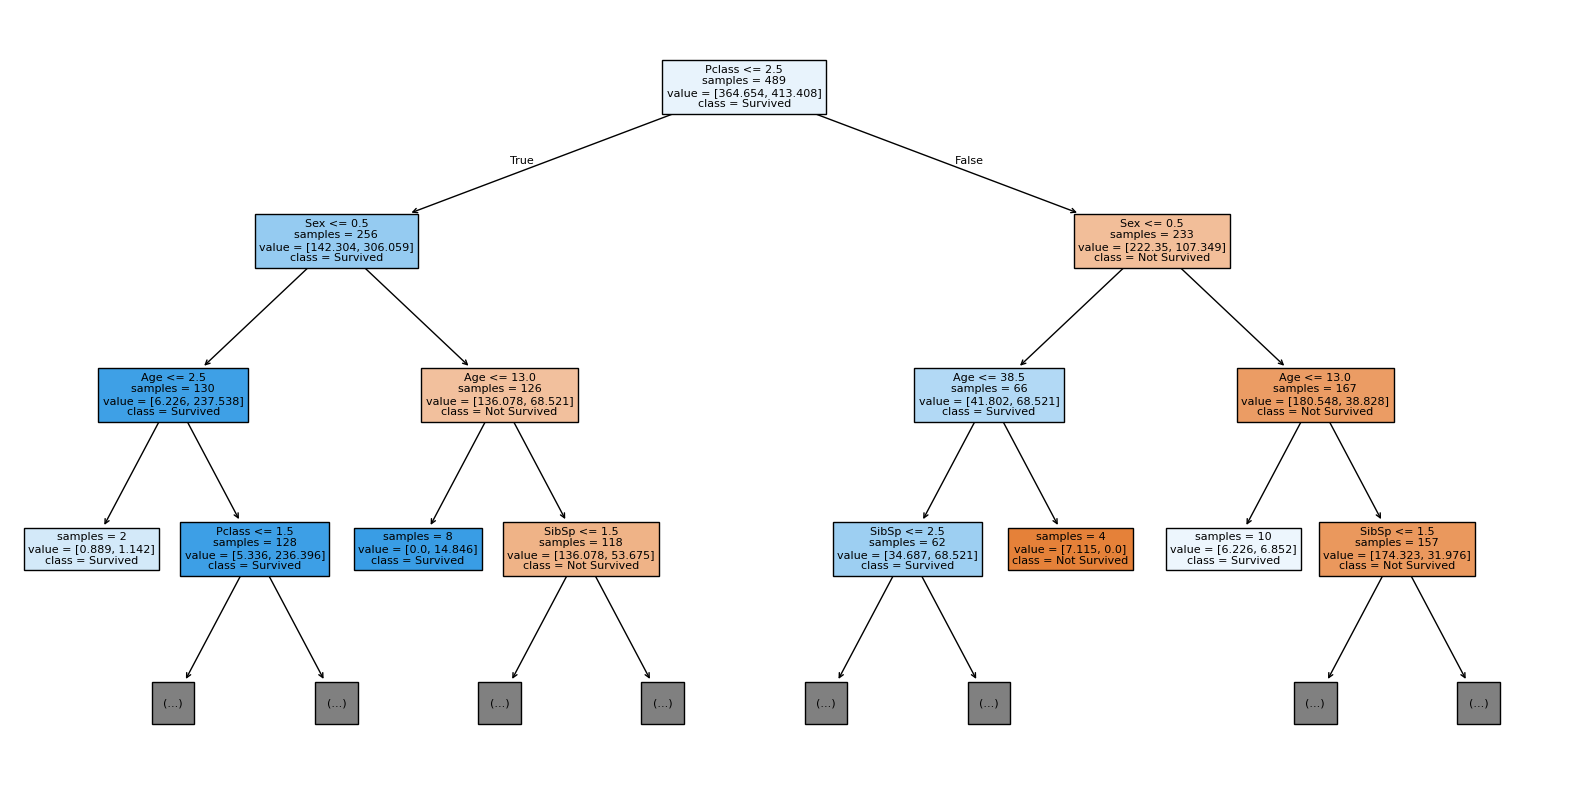

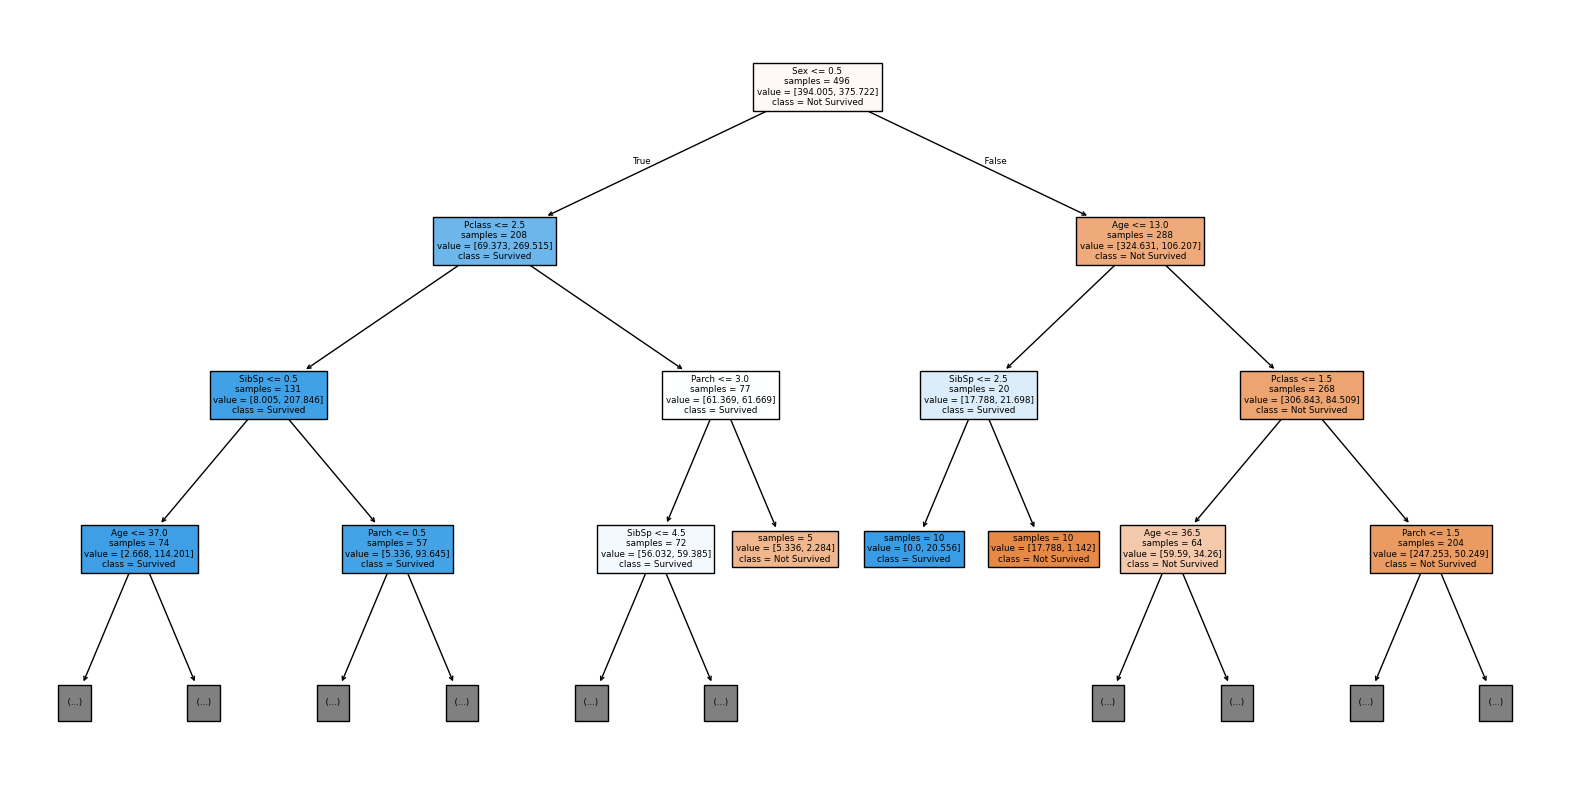

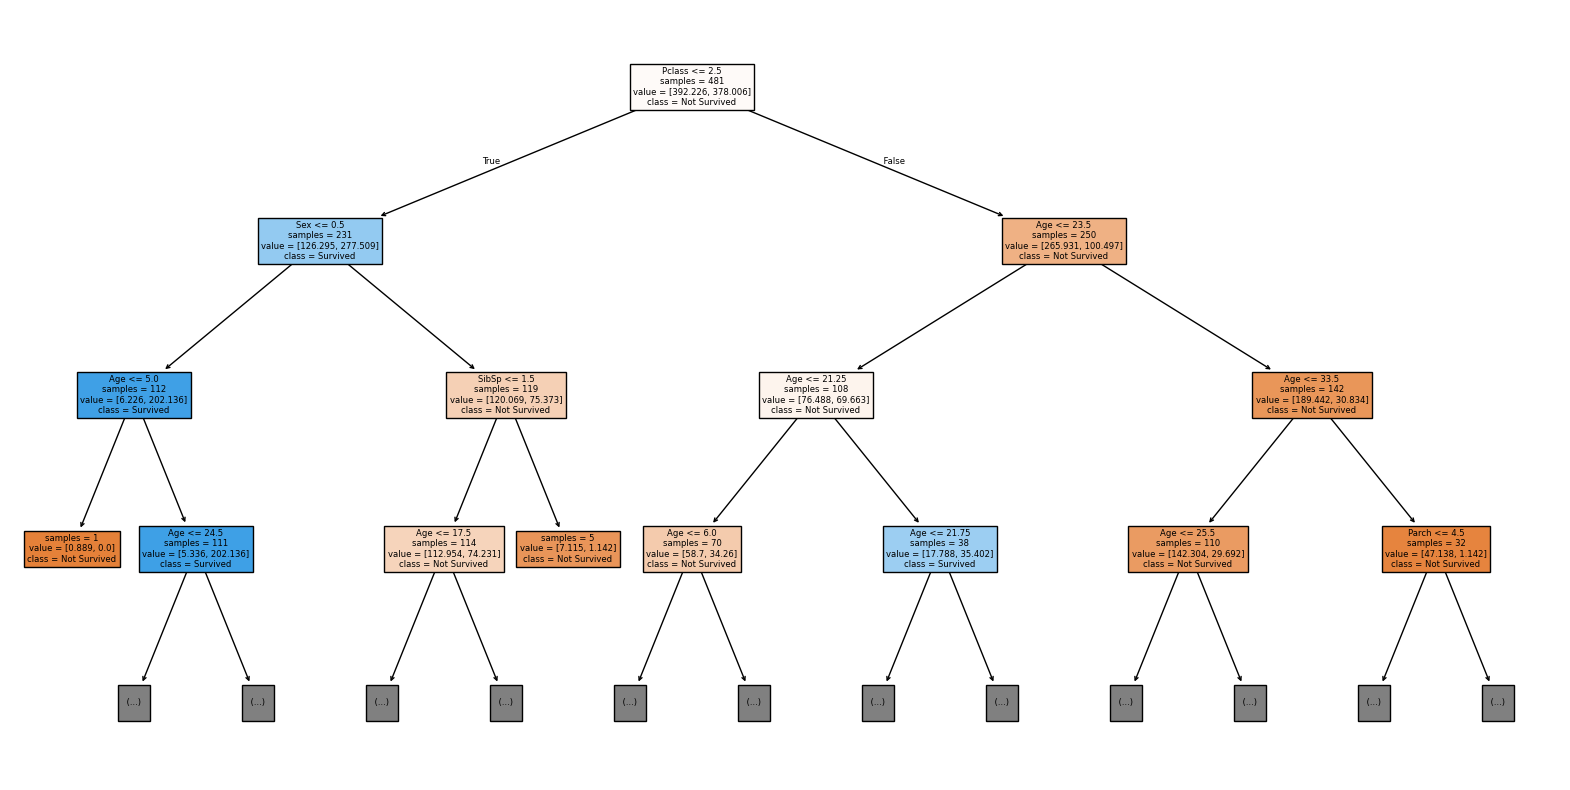

In [84]:
for i in range(3):
    tree = randomForestModel.estimators_[i]
    # Visualize tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X.columns,max_depth=3,
            class_names=['Not Survived', 'Survived'], impurity=False)

random forest feature imortance [0.15330578 0.61789055 0.14720212 0.08160154 0.        ]
decision tree feature imortance [0.21241821 0.57493957 0.13461099 0.04181806 0.03621317]


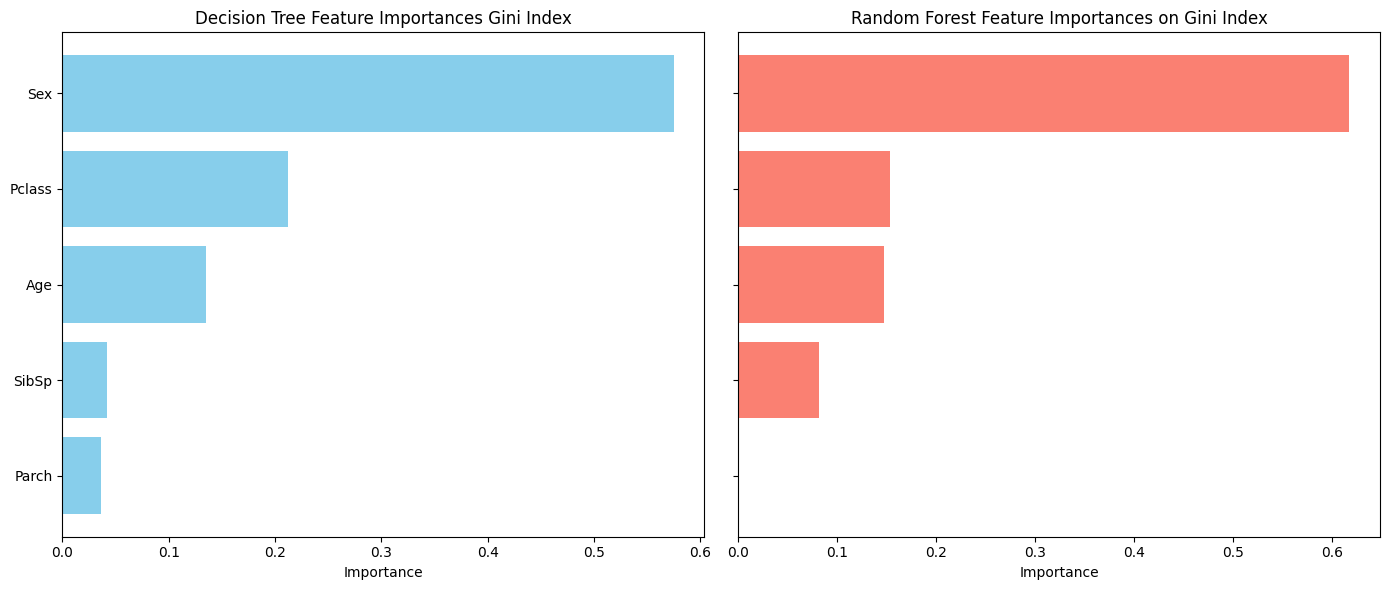

In [85]:

# Simulated importances (replace with actual model.feature_importances_)
decision_tree_importances = randomForestModel.feature_importances_
random_forest_importances = decision_tree.feature_importances_

print(f'random forest feature imortance {random_forest_importances}')

print(f'decision tree feature imortance {decision_tree_importances}')

# Create DataFrames
dt_df = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree_importances})
rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest_importances})

# Sort values for clean plotting
dt_df = dt_df.sort_values(by='Importance', ascending=True)
rf_df = rf_df.sort_values(by='Importance', ascending=True)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

axes[0].barh(dt_df['Feature'], dt_df['Importance'], color='skyblue')
axes[0].set_title('Decision Tree Feature Importances Gini Index')
axes[0].set_xlabel('Importance')

axes[1].barh(rf_df['Feature'], rf_df['Importance'], color='salmon')
axes[1].set_title('Random Forest Feature Importances on Gini Index')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()


### conclusion
based on The Decision Tree and Random Forest models feature imprtance (by gini index)  Sex (gender) was  the most crucial factor, it indicate that being female significantly increased survival chances. Pclass (passenger class) was  the second most important, suggesting that higher socioeconomic status, particularly 1st class, improved survival rates. Age had some influence, showing younger people had a slightly higher chance, while family features like SibSp and Parch were less significant in predicting survival. also you can see this order of feature imortance on deceision Tree Plot  branchs order explicity